In [2]:
import os,os.path
import sys 
import fnmatch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #requires 0.9.0
sns.set(color_codes=True)


In [21]:
IMAGE_PATH = 'data/tweaked_data/images/'
cols = ['class','total']

def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]

segment_directories = get_immediate_subdirectories(IMAGE_PATH)
file_count = list()

for directory in segment_directories:
    file_count.append([directory,len(fnmatch.filter(os.listdir(IMAGE_PATH+directory), '*.jpg'))])
    
print(file_count) 
df_class_count = pd.DataFrame.from_records(file_count,columns=cols,exclude=None,index=None)

print(df_class_count.head())

[['cat', 10823], ['car', 5519], ['dog', 52793], ['pottedplant', 765], ['person', 10699], ['sheep', 1345], ['boat', 1648], ['chair', 2841], ['bus', 761], ['motorbike', 875], ['sofa', 2274], ['bird', 3746], ['aeroplane', 3195], ['tvmonitor', 1956], ['train', 2174], ['bicycle', 2080], ['horse', 2250], ['bottle', 3089], ['cow', 1369], ['diningtable', 402]]
         class  total
0          cat  10823
1          car   5519
2          dog  52793
3  pottedplant    765
4       person  10699


Text(0, 0.5, 'Totals')

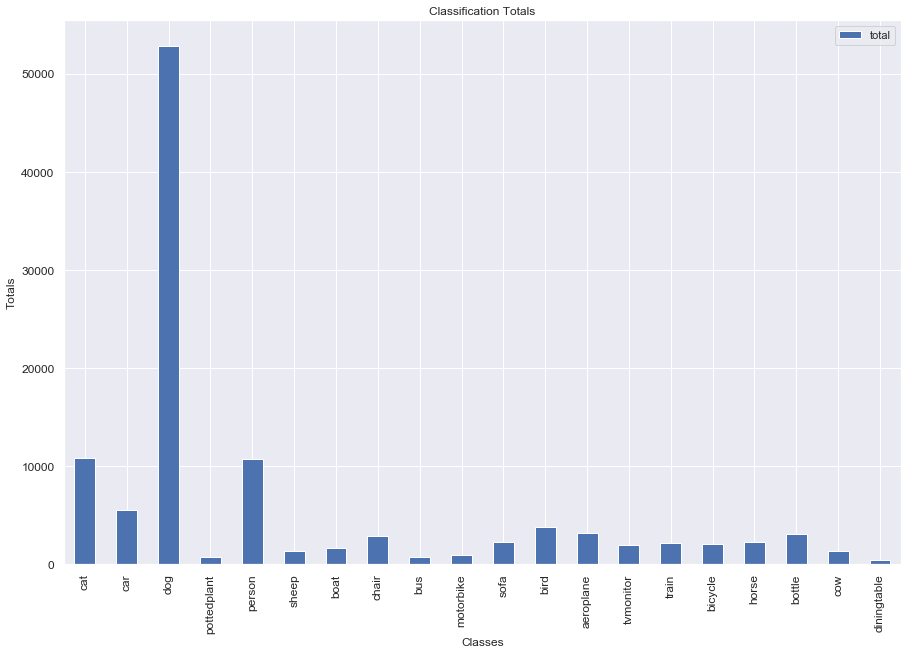

In [31]:
ax = df_class_count.plot(x='class',kind='bar', title ="Classification Totals",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Classes",fontsize=12)
ax.set_ylabel("Totals",fontsize=12)

In [5]:
from keras.datasets import cifar10
import seaborn as sns

def plotDataAndCov(data):
    ACov = np.cov(data, rowvar=True, bias=True)
    print('Covariance matrix:\n', ACov.shape)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(20, 20)

    ax0 = plt.subplot(2, 2, 1)
    
    # Choosing the colors
    cmap = sns.color_palette("RdYlGn", 20)
    sns.heatmap(ACov, cmap=cmap, vmin=0)

    ax1 = plt.subplot(2, 2, 2)
    ax1.matshow(ACov,cmap=plt.cm.RdYlGn,)
    

def plotImage(X):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(X.reshape(32,32,3))
    plt.show()
    plt.close()
    


(3195, 300, 300, 3)
(3195, 270000)


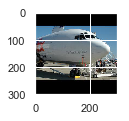

Covariance matrix:
 (3195, 3195)
X.min() 0.0
X.max() 1.0
[-0.00172328 -0.00172328 -0.00172328 ... -0.00172328 -0.00172328
 -0.00172328]
Covariance matrix:
 (3195, 3195)


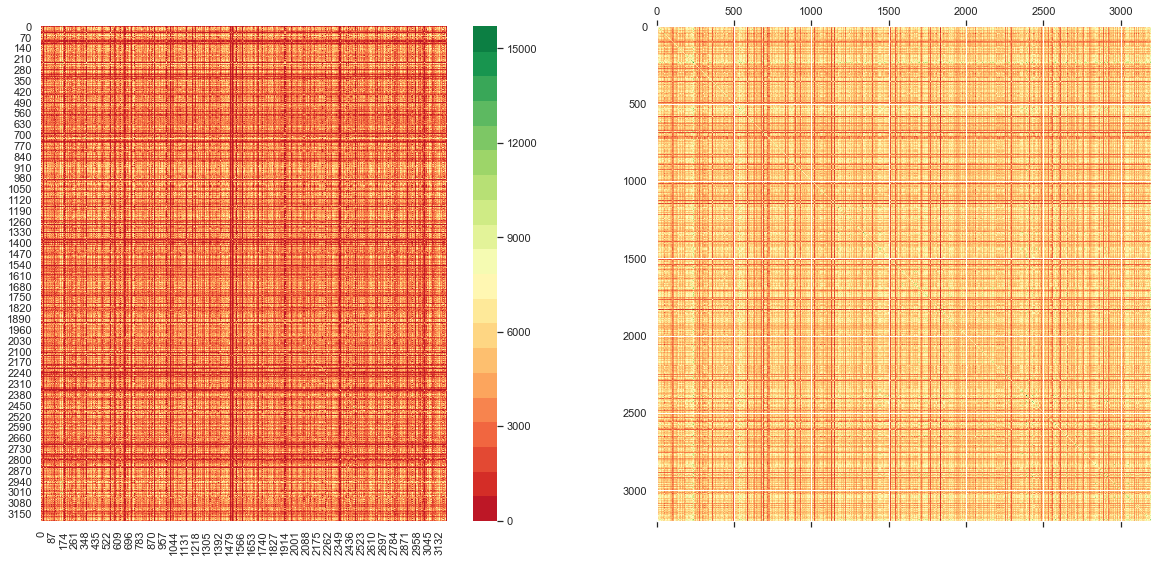

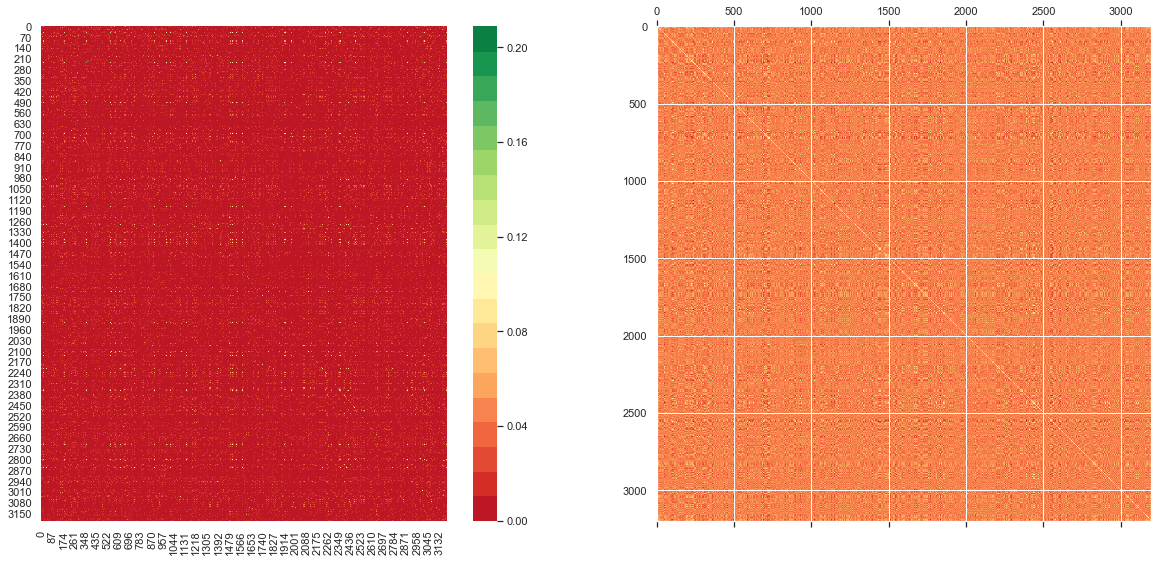

In [4]:
from PIL import Image
# https://hadrienj.github.io/posts/Preprocessing-for-deep-learning/
IMAGE_PATH = 'data/tweaked_data/images/aeroplane/'
images = list()
for filename in os.listdir(IMAGE_PATH):
    if filename != '.DS_Store':
        images.append(os.path.join(IMAGE_PATH, filename))


x_data = np.array( [np.array(Image.open(images[i])) for i in range(len(images))] )
print(x_data.shape)
X = x_data.reshape(x_data.shape[0], x_data.shape[1]*x_data.shape[2]*x_data.shape[3])
print(X.shape)


plt.figure(figsize=(1.5, 1.5))
plt.imshow(X[2, :].reshape(300,300,3))
plt.show()
plt.close()

plotDataAndCov(X)

#Normalize the data
X_norm = X / 255.
print('X.min()', X_norm.min())
print('X.max()', X_norm.max())

X_norm.mean(axis=0).shape
X_norm.mean(axis=0)
X_norm = X_norm - X_norm.mean(axis=0)
X_norm.mean(axis=0)
print(X_norm[:,0])
plotDataAndCov(X_norm)


(3195, 32, 32, 3)
(3195, 3072)


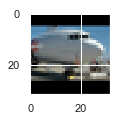

Covariance matrix:
 (3195, 3195)
X.min() 0.0
X.max() 1.0
[-0.00211482 -0.00211482 -0.00211482 ... -0.00211482 -0.00211482
 -0.00211482]
Covariance matrix:
 (3195, 3195)


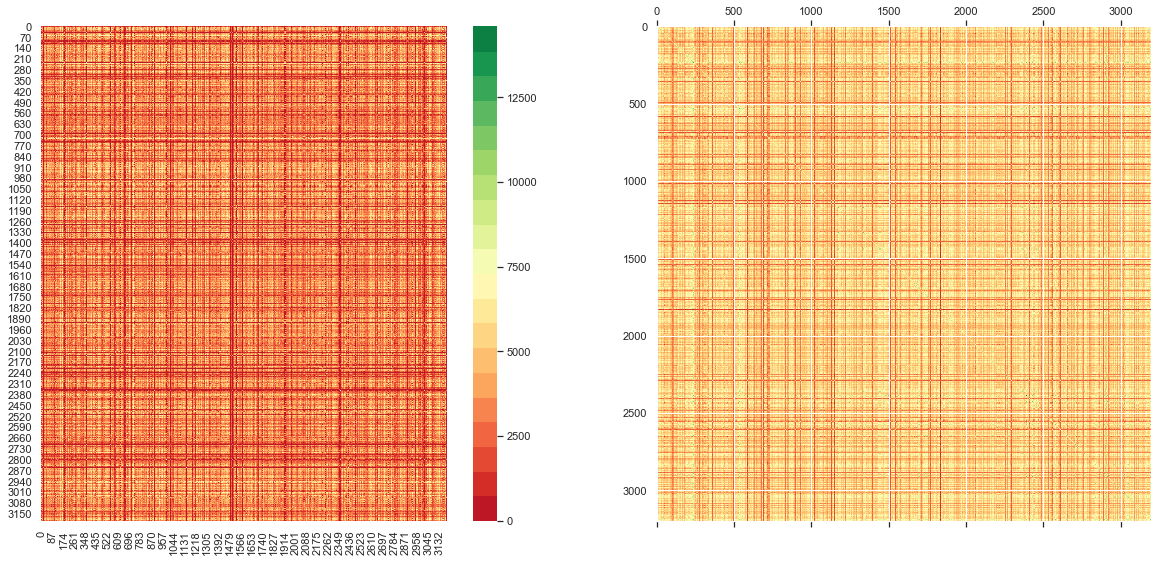

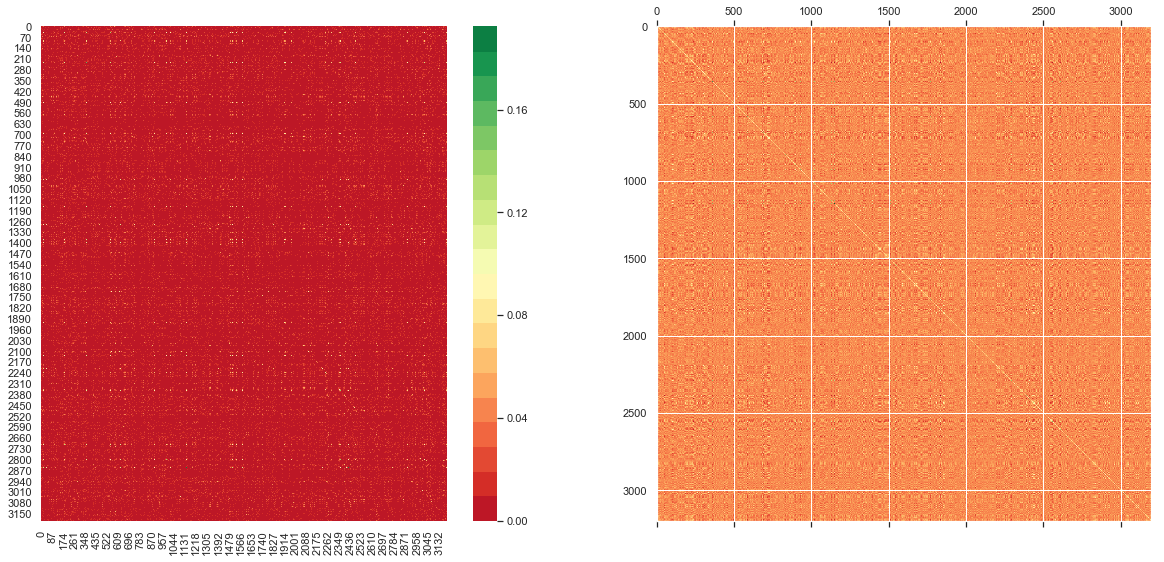

In [7]:
from PIL import Image
# https://hadrienj.github.io/posts/Preprocessing-for-deep-learning/
IMAGE_PATH = 'data/tweaked_data/images/aeroplane/'
images = list()
size = 32, 32
for filename in os.listdir(IMAGE_PATH):
    if filename != '.DS_Store':
        images.append(os.path.join(IMAGE_PATH, filename))


x_data = np.array( [np.array(Image.open(images[i]).resize(size, Image.ANTIALIAS)) for i in range(len(images))] )
print(x_data.shape)
X = x_data.reshape(x_data.shape[0], x_data.shape[1]*x_data.shape[2]*x_data.shape[3])
print(X.shape)


plt.figure(figsize=(1.5, 1.5))
plt.imshow(X[2, :].reshape(32,32,3))
plt.show()
plt.close()

plotDataAndCov(X)

#Normalize the data
X_norm = X / 255.
print('X.min()', X_norm.min())
print('X.max()', X_norm.max())

X_norm.mean(axis=0).shape
X_norm.mean(axis=0)
X_norm = X_norm - X_norm.mean(axis=0)
X_norm.mean(axis=0)
print(X_norm[:,0])
plotDataAndCov(X_norm)